<a href="https://colab.research.google.com/github/GubioGL/Aprendendo_pytorch/blob/main/pytorch_leaning_01_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch as tc
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

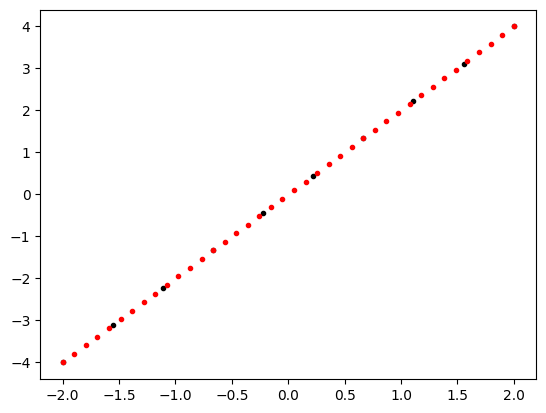

In [2]:
def fun(a,x_):
    return a*x_    #$tc.exp(-a*x_**2)

# Criando os dados de treino
x_train = tc.linspace(-2,2,10).reshape(10,1)
y_train = fun(2,x_train)

# Criando os dados de teste
x_test = tc.linspace(-2,2,40).reshape(40,1)
y_test = fun(2,x_test)

# Visualizando os dados de treino

plt.plot(x_train,y_train,"k." )
plt.plot(x_test,y_test,"r.",label="test" )
plt.show()

In [3]:
# Construindo o modelo

class Regressao(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(1,1)
    def forward(self, x: tc.Tensor) -> tc.Tensor:
        return self.linear_layer(x) #

In [4]:
model = Regressao()

In [5]:
# Check model device
next(model.parameters()).device

device(type='cpu')

In [6]:
# Configurando GPU
model.to( 'cuda') # the device variable was set above to be "cuda" if available or "cpu" if not
next(model.parameters()).device

device(type='cuda', index=0)

In [7]:
x_train = x_train.to( 'cuda')
x_test  = x_test.to(  'cuda')
y_train = y_train.to( 'cuda')
y_test  = y_test.to(  'cuda')

loss_fn = nn.L1Loss()
optimizer = tc.optim.SGD(params=model.parameters(),lr=0.01)

epochs = 1000
for epoch in range(epochs):
    model.train()

    y_preds = model(x_train)
    loss = loss_fn(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

    with tc.inference_mode():
        y_preds_test = model(x_test)
        loss_test = loss_fn(y_preds_test,y_test)
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {loss_test} ")




Epoch: 0 | MAE Train Loss: 2.358814001083374 | MAE Test Loss: 2.183546543121338 
Epoch: 100 | MAE Train Loss: 1.1810362339019775 | MAE Test Loss: 1.0853289365768433 
Epoch: 200 | MAE Train Loss: 0.08701141923666 | MAE Test Loss: 0.07759565114974976 
Epoch: 300 | MAE Train Loss: 0.007660275790840387 | MAE Test Loss: 0.004369075410068035 
Epoch: 400 | MAE Train Loss: 0.007660275790840387 | MAE Test Loss: 0.004369075410068035 
Epoch: 500 | MAE Train Loss: 0.007660275790840387 | MAE Test Loss: 0.004369075410068035 
Epoch: 600 | MAE Train Loss: 0.007660275790840387 | MAE Test Loss: 0.004369075410068035 
Epoch: 700 | MAE Train Loss: 0.007660275790840387 | MAE Test Loss: 0.004369075410068035 
Epoch: 800 | MAE Train Loss: 0.007660275790840387 | MAE Test Loss: 0.004369075410068035 
Epoch: 900 | MAE Train Loss: 0.007660275790840387 | MAE Test Loss: 0.004369075410068035 


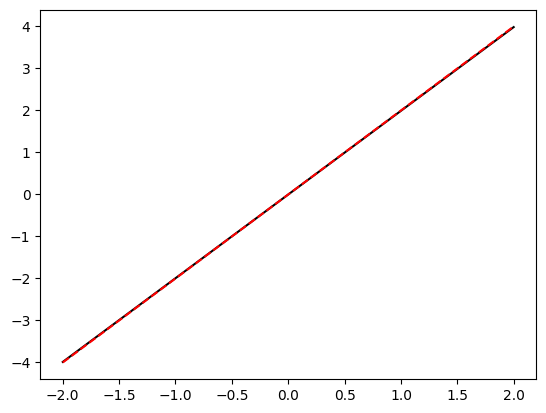

In [8]:
model.eval()
with tc.inference_mode():
    y_preds = model(x_test)
# Visualizando os dados de treino
plt.plot(x_test.cpu(),y_preds.cpu(),"k-" )
plt.plot(x_test.cpu(),y_test.cpu(),"r--",label="test" )
plt.show()